In [20]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# df = pd.read_csv('http://www.ishelp.info/data/bikebuyers.csv')
# df.head()

In [21]:
# df.Education.unique()

In [17]:
# df['Education_rank'] = df['Education']
# df.Education_rank.replace(['Partial High School','High School','Partial College','Bachelors','Graduate Degree'], [1, 2, 3, 4, 5], inplace=True)
# df.Education_rank.astype('int64')

In [19]:
# df['Commute_rank'] = df['Commute Distance']
# df.Commute_rank.replace(['0-1 Miles', '1-2 Miles', '2-5 Miles', '5-10 Miles', '10+ Miles'], [0, 1, 2, 5, 10], inplace=True)
# df.astype({'Commute_rank': 'int64'})

In [23]:
def clean_bikebuyers():
    import pandas as pd
    
    df = pd.read_csv('http://www.ishelp.info/data/bikebuyers_original.csv')
    df['Education_rank'] = df['Education']
    df['Commute_rank'] = df['Commute Distance']
    df['Purchased Bike'] = df['Purchased Bike']
    df.Education_rank.replace(['Partial High School','High School','Partial College','Bachelors','Graduate Degree'], 
                             [1, 2, 3, 4, 5], inplace=True)
    df.Commute_rank.replace(['0-1 Miles', '1-2 Miles', '2-5 Miles', '5-10 Miles', '10+ Miles'], 
                            [0, 1, 2, 5, 10], inplace=True)
    df['Purchased Bike'].replace(['Yes', 'No'], [0, 1], inplace=True)
    df.astype({'Education_rank': 'int64'})
    df.astype({'Commute_rank': 'int64'})
    df['Purchased Bike'].astype('int64')
    
    return df

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = clean_bikebuyers()

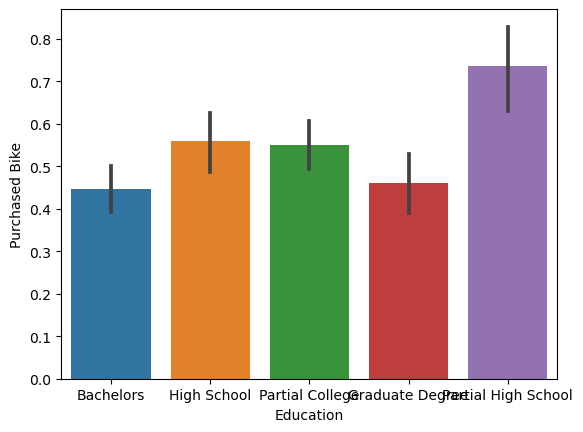

In [32]:
sns.barplot(x=df['Education'], y=df["Purchased Bike"]);

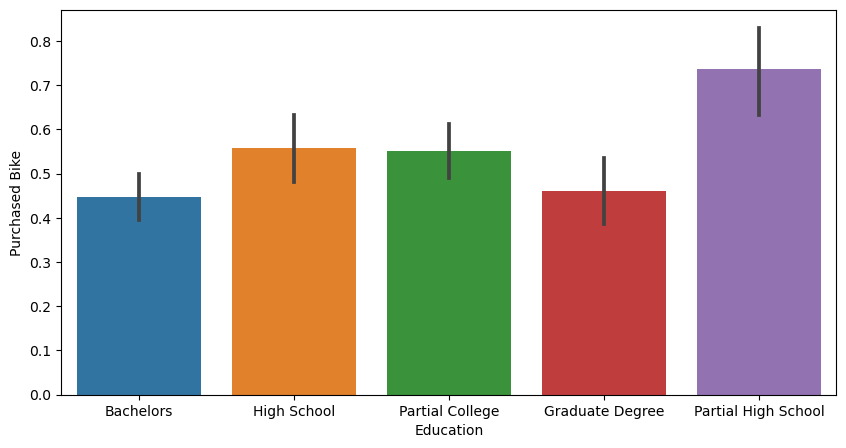

In [33]:
## fix collision
plt.figure(figsize=(10, 5))
sns.barplot(x=df['Education'], y=df["Purchased Bike"]);

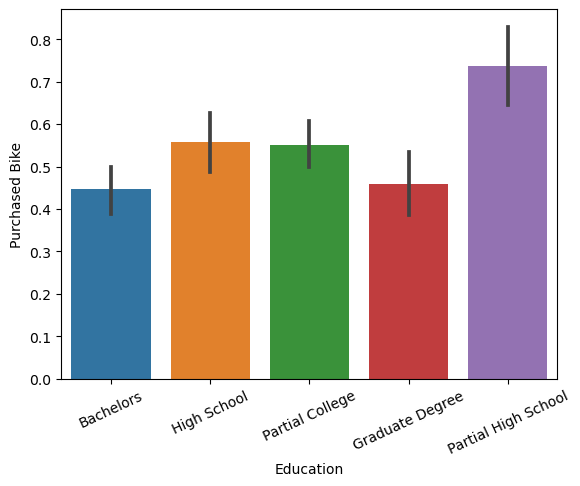

In [36]:
## rotating lables

viz = sns.barplot(x=df['Education'], y=df["Purchased Bike"])
viz.set_xticklabels(viz.get_xticklabels(), rotation=25)
plt.show()

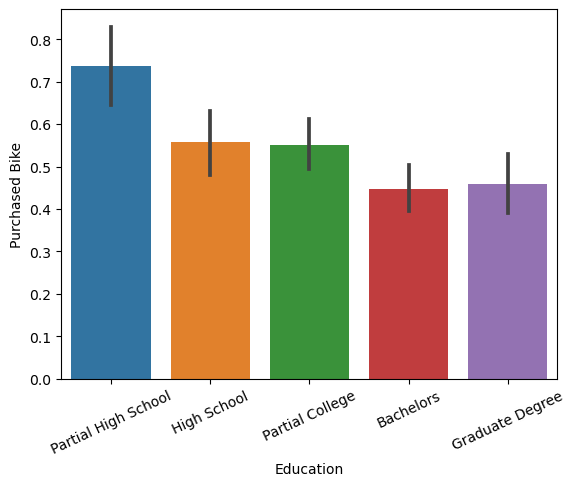

In [37]:
## add new parameter to set a order

viz = sns.barplot(x=df['Education'], y=df["Purchased Bike"],
                 order=['Partial High School','High School','Partial College','Bachelors','Graduate Degree']);
viz.set_xticklabels(viz.get_xticklabels(), rotation=25);

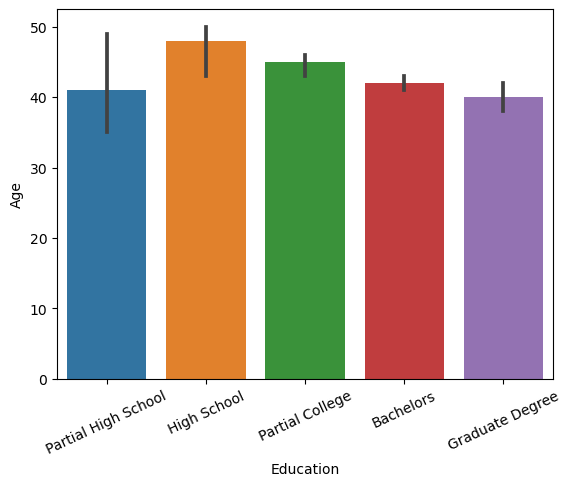

In [39]:
viz = sns.barplot(x=df['Education'], y=df["Age"], estimator=np.median, 
                 order=['Partial High School','High School','Partial College','Bachelors','Graduate Degree']);
viz.set_xticklabels(viz.get_xticklabels(), rotation=25);

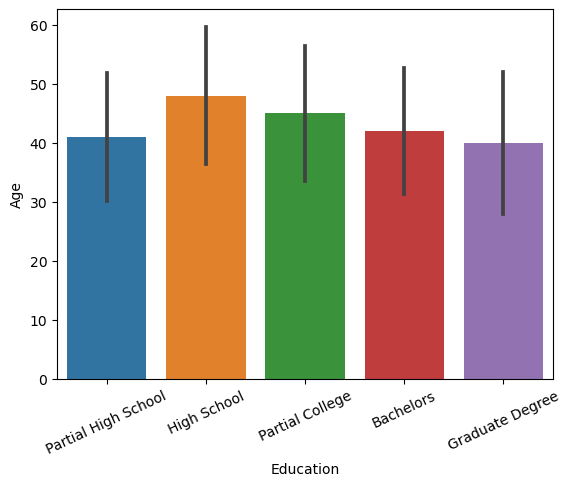

In [41]:
## error bar -> sd

viz = sns.barplot(x=df['Education'], y=df["Age"], estimator=np.median, errorbar='sd',
                 order=['Partial High School','High School','Partial College','Bachelors','Graduate Degree']);
viz.set_xticklabels(viz.get_xticklabels(), rotation=25);

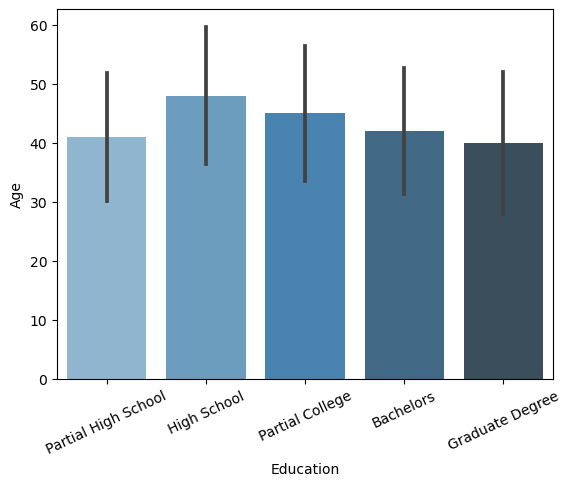

In [42]:
## color

viz = sns.barplot(x=df['Education'], y=df["Age"], estimator=np.median, errorbar='sd', palette='Blues_d',
                 order=['Partial High School','High School','Partial College','Bachelors','Graduate Degree']);
viz.set_xticklabels(viz.get_xticklabels(), rotation=25);

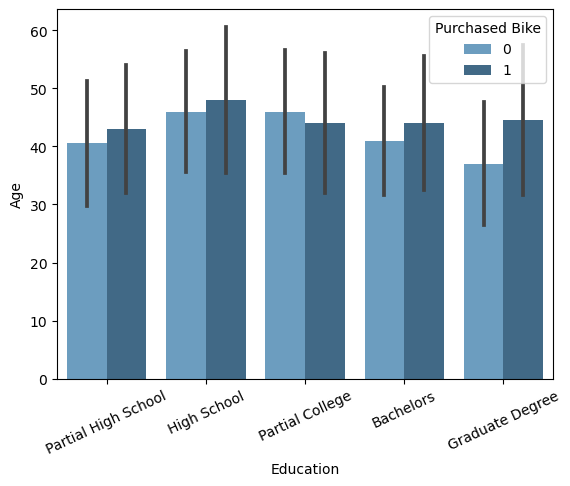

In [43]:
viz = sns.barplot(x=df['Education'], y=df["Age"], hue=df['Purchased Bike'], estimator=np.median, errorbar='sd', palette='Blues_d',
                 order=['Partial High School','High School','Partial College','Bachelors','Graduate Degree']);
viz.set_xticklabels(viz.get_xticklabels(), rotation=25);

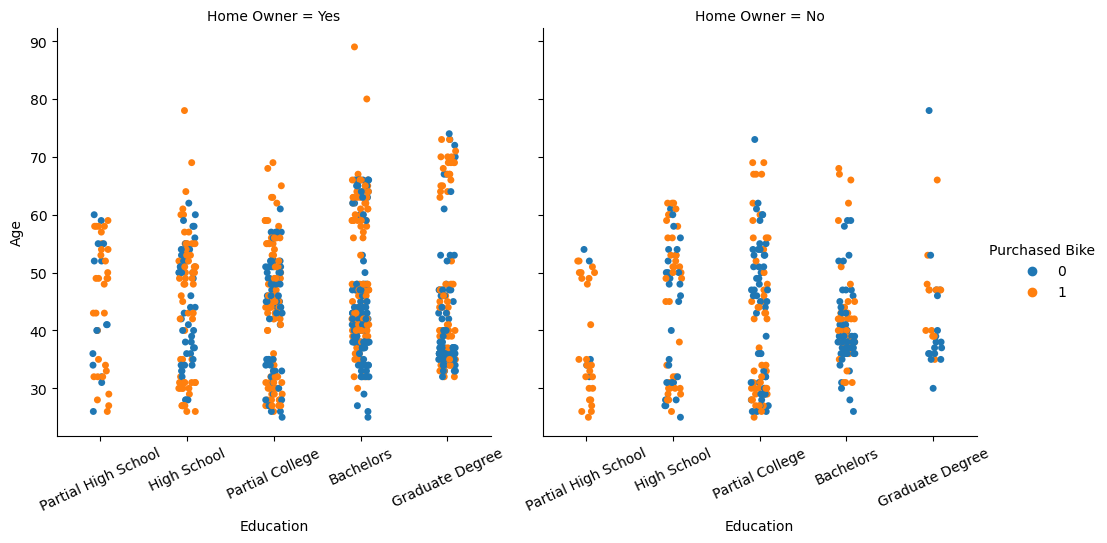

In [46]:
viz = sns.catplot(data=df, x='Education', y="Age", hue='Purchased Bike', col='Home Owner', estimator=np.median, errorbar='sd',
                 order=['Partial High School','High School','Partial College','Bachelors','Graduate Degree']);
viz.set_xticklabels(rotation=25);

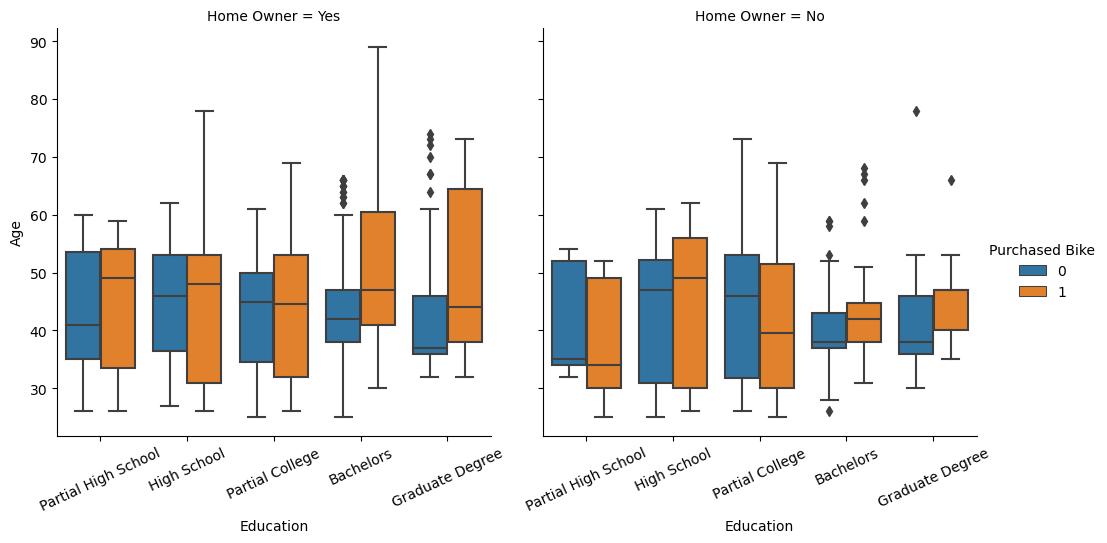

In [49]:
viz = sns.catplot(data=df, x='Education', y="Age", hue='Purchased Bike', col='Home Owner', estimator=np.median, errorbar='sd', kind='box',
                 order=['Partial High School','High School','Partial College','Bachelors','Graduate Degree']);
viz.set_xticklabels(rotation=25);

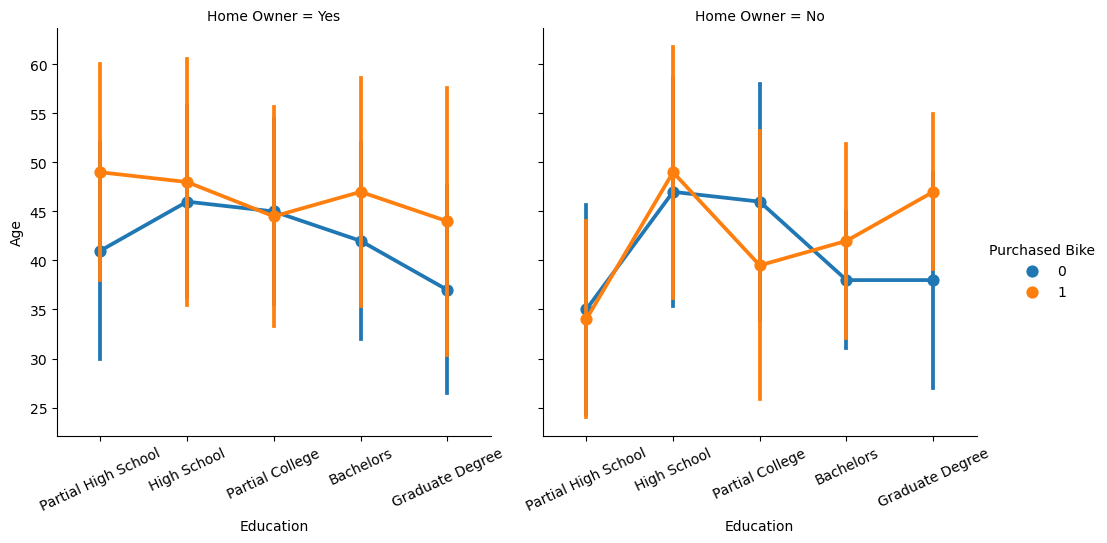

In [50]:
viz = sns.catplot(data=df, x='Education', y="Age", hue='Purchased Bike', col='Home Owner', estimator=np.median, errorbar='sd', kind='point',
                 order=['Partial High School','High School','Partial College','Bachelors','Graduate Degree']);
viz.set_xticklabels(rotation=25);

In [55]:
from scipy import stats
import pandas as pd

df = clean_bikebuyers()

groups = df['Education'].unique()
group_labels = []
for g in groups:
    group_labels.append(df[df['Education'] == g]['Purchased Bike'])

F, p = stats.f_oneway(*group_labels)

print(str(round(F, 4)))
print(str(round(p, 4)))

6.4653
0.0


In [56]:
r, p = stats.pearsonr(df['Education_rank'], df['Purchased Bike'])

print(str(round(r, 4)))
print(str(round(p, 4)))

-0.1408
0.0


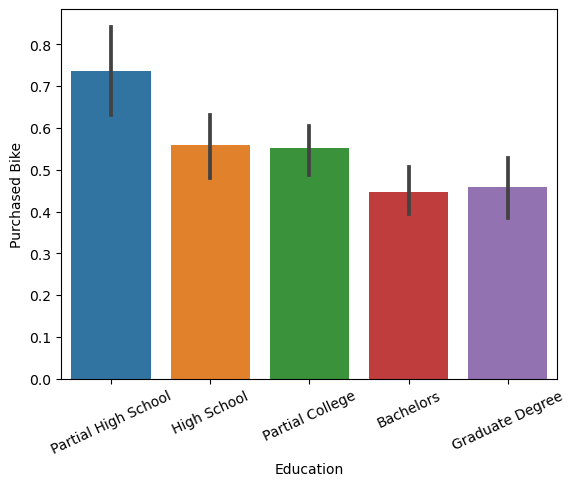

In [57]:
viz = sns.barplot(x=df['Education'], y=df["Purchased Bike"],
                 order=['Partial High School','High School','Partial College','Bachelors','Graduate Degree']);
viz.set_xticklabels(viz.get_xticklabels(), rotation=25);

In [58]:
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['Purchased Bike'], df['Education'])
print(mc.tukeyhsd())

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1            group2       meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------
      Bachelors     Graduate Degree   0.0121  0.999 -0.1163 0.1404  False
      Bachelors         High School   0.1109 0.1204 -0.0162 0.2381  False
      Bachelors     Partial College   0.1032 0.0942 -0.0102 0.2166  False
      Bachelors Partial High School   0.2891 0.0001  0.1159 0.4623   True
Graduate Degree         High School   0.0989 0.3297  -0.045 0.2428  False
Graduate Degree     Partial College   0.0912 0.3236 -0.0407  0.223  False
Graduate Degree Partial High School   0.2771 0.0005  0.0913 0.4629   True
    High School     Partial College  -0.0077 0.9998 -0.1385  0.123  False
    High School Partial High School   0.1782 0.0655 -0.0068 0.3632  False
Partial College Partial High School   0.1859 0.0322  0.0101 0.3617   True
--------------------------------------

Significant t-tests below 0.005:


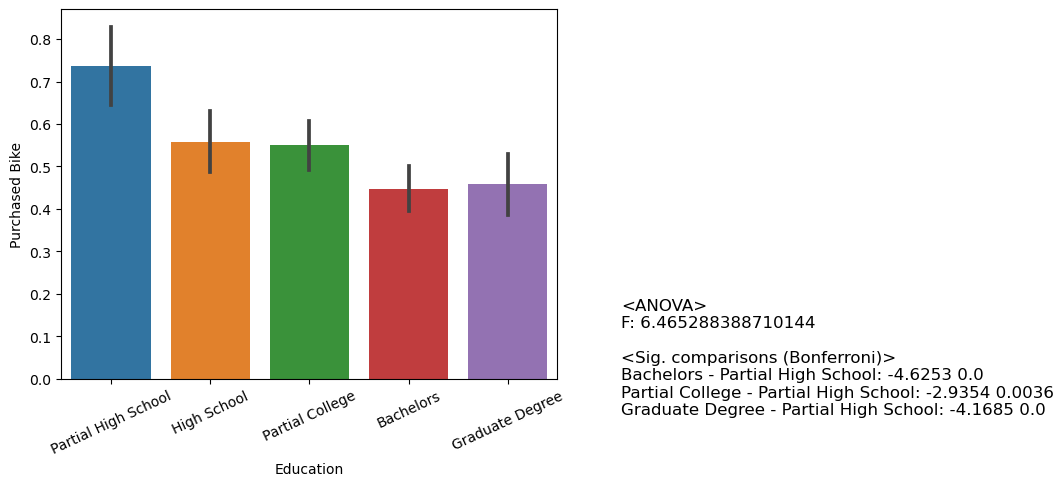

In [68]:
e_types = df.Education.unique()
ttests = []

for i, e in enumerate(e_types):
    for i2, e2 in enumerate(e_types):
        if i2 > i:
            g1 = df[df.Education == e]['Purchased Bike']
            g2 = df[df.Education == e2]['Purchased Bike']
            t, p = stats.ttest_ind(g1, g2)
            
            ttests.append([f'{e} - {e2}:', t.round(4), p.round(4)])
            
textstr = f'<ANOVA>\n'
textstr += f'F: {F}\n\n'
textstr += f'<Sig. comparisons (Bonferroni)>\n'

threshold = 0.05 / len(ttests)
print(f'Significant t-tests below {threshold}:')
for t in ttests:
    if t[2] <= threshold:
        textstr += f'{t[0]} {t[1]} {t[2]}\n'
        
viz = sns.barplot(x=df['Education'], y=df["Purchased Bike"],
                 order=['Partial High School','High School','Partial College','Bachelors','Graduate Degree']);
viz.set_xticklabels(viz.get_xticklabels(), rotation=25);
plt.text(1, 0, textstr, fontsize=12, transform=plt.gcf().transFigure);